
Daily Resampled Data:
                 Open      High       Low     Close    Volume
Timestamp                                                   
2012-01-01  4.707410  4.707410  4.707410  4.707410  0.017647
2012-01-02  5.000000  5.000000  5.000000  5.000000  0.013228
2012-01-03  5.145917  5.145917  5.145917  5.145917  0.061137
2012-01-04  5.228583  5.228729  5.228583  5.228729  0.074468
2012-01-05  6.134847  6.134917  6.134847  6.134917  0.065835

Monthly Resampled Data:
                 Open      High       Low     Close    Volume
Timestamp                                                   
2012-01-31  6.247320  6.247361  6.247273  6.247329  0.045522
2012-02-29  5.232330  5.232349  5.232286  5.232306  0.114875
2012-03-31  4.953989  4.954005  4.953950  4.953967  0.201888
2012-04-30  4.980803  4.980826  4.980779  4.980802  0.381476
2012-05-31  5.042531  5.042541  5.042514  5.042523  0.422495

Annual Resampled Data:
                   Open        High         Low       Close     Volume
T

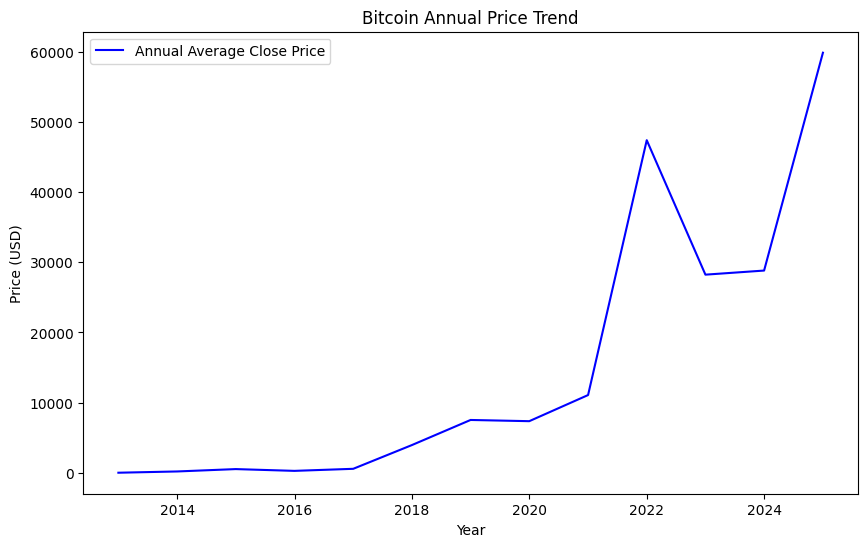

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Function to handle mixed timestamp formats
def convert_timestamp(x):
    try:
        # Try to interpret as a Unix timestamp (assuming it's a numeric value)
        if isinstance(x, (int, float)):
            return pd.to_datetime(x, unit='s')
        else:
            # Otherwise, interpret it as a regular datetime string
            return pd.to_datetime(x)
    except:
        return pd.NaT  # Return NaT (Not a Time) if conversion fails

# Load the data (ensure the file path is correct)
df = pd.read_csv('./btcusd_1-min_data.csv')

# Apply the conversion function to handle mixed formats
df['Timestamp'] = df['Timestamp'].apply(convert_timestamp)

# Drop any rows with NaT in the 'Timestamp' column after conversion
df.dropna(subset=['Timestamp'], inplace=True)

# Set the 'Timestamp' column as the DataFrame index for resampling
df.set_index('Timestamp', inplace=True)

# Resample to daily frequency and compute mean values
df_daily = df.resample('D').mean()

# Resample to monthly frequency and compute mean values
df_monthly = df.resample('M').mean()

# Resample to annual frequency and compute mean values
df_annual = df.resample('A-DEC').mean()

# Resample to quarterly frequency and compute mean values
df_quarterly = df.resample('Q-DEC').mean()

# Print the resampled data for verification
print("\nDaily Resampled Data:\n", df_daily.head())
print("\nMonthly Resampled Data:\n", df_monthly.head())
print("\nAnnual Resampled Data:\n", df_annual.head())
print("\nQuarterly Resampled Data:\n", df_quarterly.head())

# Example plotting the resampled annual data
plt.figure(figsize=(10, 6))
plt.plot(df_annual.index, df_annual['Close'], label='Annual Average Close Price', color='blue')
plt.title('Bitcoin Annual Price Trend')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


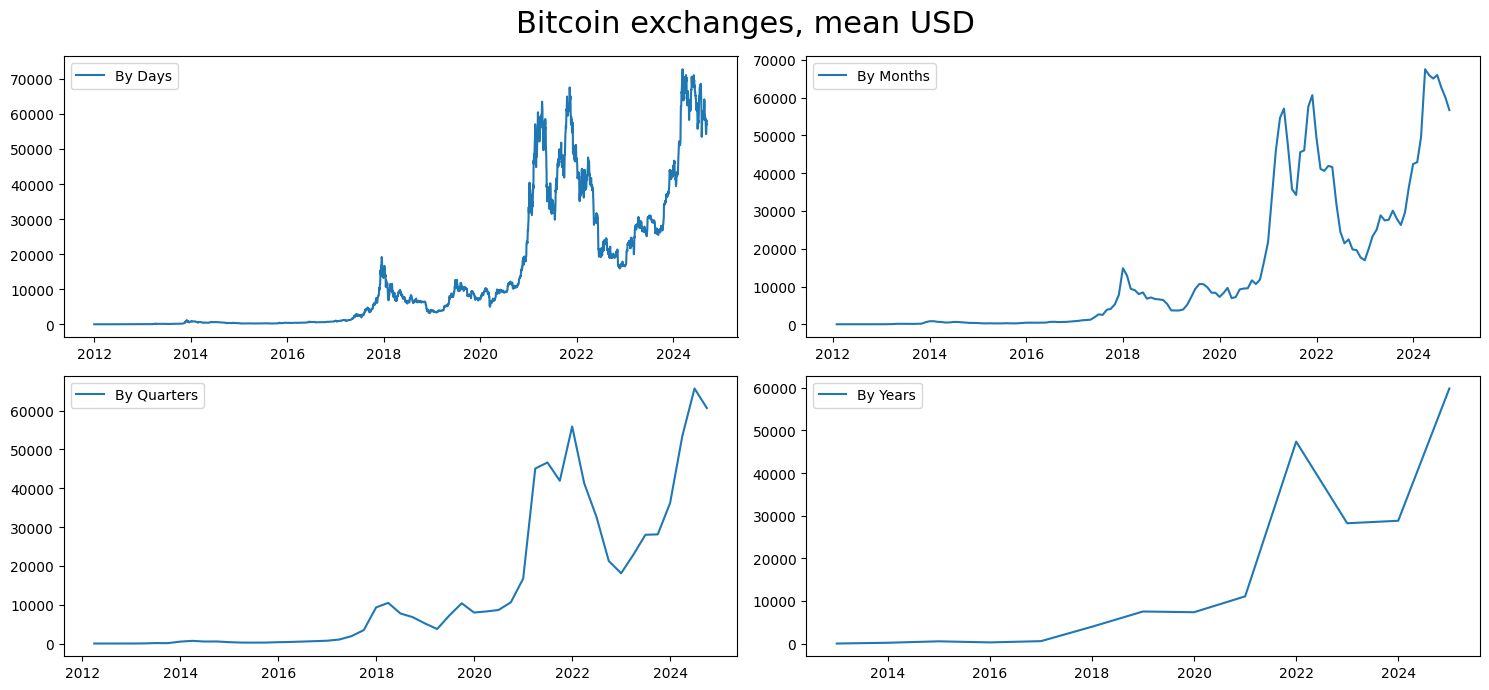

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./btcusd_1-min_data.csv')

# Calculate the weighted price as the average of High, Low, and Close (replace these with actual column names)
if 'High' in df.columns and 'Low' in df.columns and 'Close' in df.columns:
    df['weighted_price'] = (df['High'] + df['Low'] + df['Close']) / 3
else:
    print("Required columns ('High', 'Low', 'Close') not found in the dataset.")

# Convert Timestamp to datetime (no unit needed since it's already in a datetime string format)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Simply use pd.to_datetime without 'unit'

# Set Timestamp as the index
df.set_index('Timestamp', inplace=True)

# Resample to daily, monthly, quarterly, and annual frequencies
df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()
df_quarterly = df.resample('Q').mean()
df_annual = df.resample('A').mean()

# Plot the resampled data
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df_daily['weighted_price'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_monthly['weighted_price'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quarterly['weighted_price'], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_annual['weighted_price'], '-', label='By Years')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Dickey–Fuller test: p=0.8107215727857402


<Figure size 1500x700 with 0 Axes>

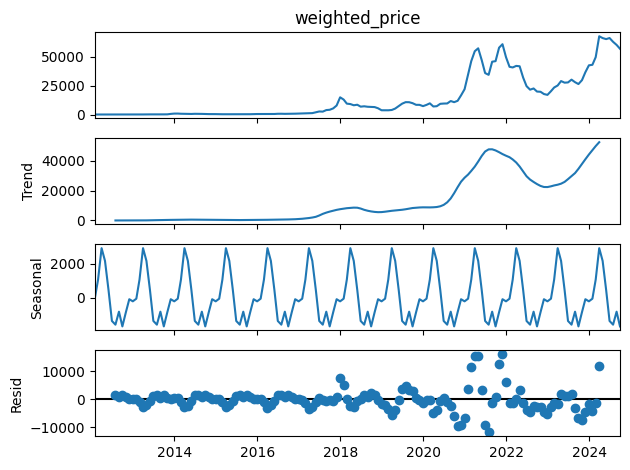

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 7])

# Perform seasonal decomposition on the monthly weighted price
sm.tsa.seasonal_decompose(df_monthly['weighted_price']).plot()

# Perform the Augmented Dickey-Fuller test to check for stationarity
p_value = sm.tsa.stattools.adfuller(df_monthly['weighted_price'].dropna())[1]  # Drop NaNs if necessary

print(f"Dickey–Fuller test: p={p_value}")

# Show the plot
plt.show()


In [34]:
import statsmodels.api as sm
import scipy.stats as stats

# Ensure correct naming and handle missing values
df_monthly = df_monthly.copy()  # Optional, make a copy to avoid modifying the original DataFrame
df_monthly = df_monthly.dropna(subset=['weighted_price'])  # Drop NaNs

# Apply Box-Cox transformation (Box-Cox requires all positive values)
df_monthly['weighted_price_box'], lmbda = stats.boxcox(df_monthly['weighted_price'])

# Output the lambda value from the Box-Cox transformation
print(f"Lambda value used for Box-Cox transformation: {lmbda}")

# Perform the Dickey-Fuller test for stationarity on the original data
p_value_original = sm.tsa.stattools.adfuller(df_monthly['weighted_price'])[1]
print(f"Dickey-Fuller test on original data: p={p_value_original}")

# Perform the Dickey-Fuller test for stationarity on the Box-Cox transformed data
p_value_boxcox = sm.tsa.stattools.adfuller(df_monthly['weighted_price_box'])[1]
print(f"Dickey-Fuller test on Box-Cox transformed data: p={p_value_boxcox}")


Lambda value used for Box-Cox transformation: 0.1461969569061115
Dickey-Fuller test on original data: p=0.8107215727857402
Dickey-Fuller test on Box-Cox transformed data: p=0.6106294619988487


In [36]:
import statsmodels.api as sm

# Ensure the correct DataFrame and handle missing values if not done earlier
df_monthly = df_monthly.dropna(subset=['weighted_price_box'])  # Ensure no NaNs in the Box-Cox transformed data

# Apply seasonal differencing (lag 12 for monthly data)
df_monthly['prices_box_diff'] = df_monthly['weighted_price_box'] - df_monthly['weighted_price_box'].shift(12)

# Perform Dickey-Fuller test after seasonal differencing
# Skip the first 12 rows to avoid NaN values resulting from the differencing
p_value_diff = sm.tsa.stattools.adfuller(df_monthly['prices_box_diff'].dropna())[1]
print(f"Dickey-Fuller test after seasonal differencing: p={p_value_diff}")


Dickey-Fuller test after seasonal differencing: p=0.03893357748800608


Dickey–Fuller test after regular and seasonal differencing: p=2.3401613867670295e-07


<Figure size 1500x700 with 0 Axes>

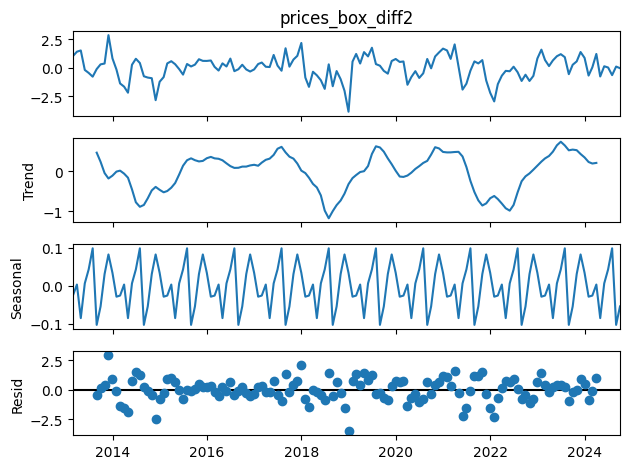

In [37]:
# Apply regular differencing after seasonal differencing (lag 1)
df_monthly['prices_box_diff2'] = df_monthly['prices_box_diff'] - df_monthly['prices_box_diff'].shift(1)

# Remove NaN values resulting from the differencing
df_monthly = df_monthly.dropna(subset=['prices_box_diff2'])

plt.figure(figsize=(15, 7))

# STL decomposition of the doubly differenced data
sm.tsa.seasonal_decompose(df_monthly['prices_box_diff2']).plot()

# Perform Dickey-Fuller test on the doubly differenced data (regular + seasonal)
p_value_diff2 = sm.tsa.stattools.adfuller(df_monthly['prices_box_diff2'])[1]
print(f"Dickey–Fuller test after regular and seasonal differencing: p={p_value_diff2}")

# Show the plots
plt.show()


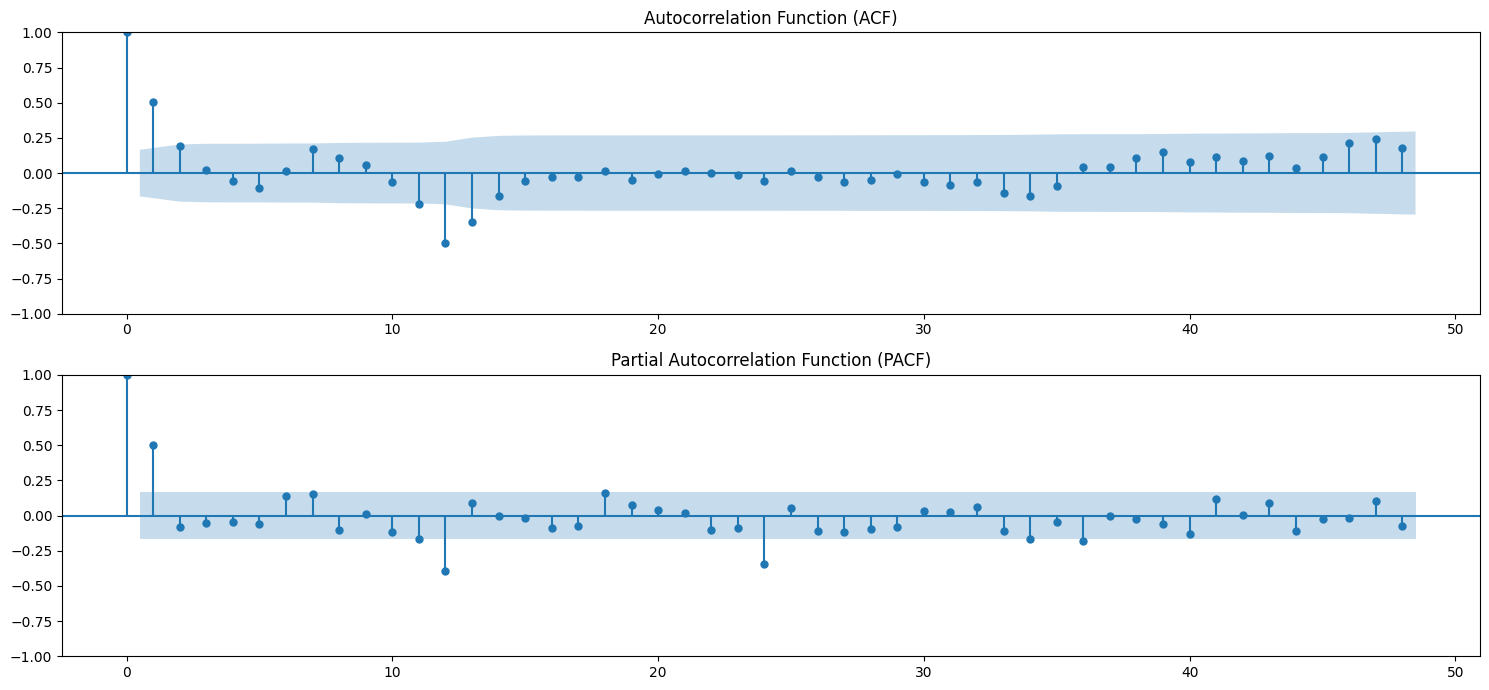

In [38]:
# Plotting ACF and PACF for the doubly differenced time series
plt.figure(figsize=(15, 7))

# Autocorrelation Plot (ACF)
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_monthly['prices_box_diff2'].values.squeeze(), lags=48, ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Plot (PACF)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_monthly['prices_box_diff2'].values.squeeze(), lags=48, ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [40]:
from itertools import product
import warnings
import statsmodels.api as sm

# Define the ranges for the parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D = 1
d = 1

# Generate all combinations of the parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print(f"Total parameter combinations to try: {len(parameters_list)}")

# Initialize lists to store the results
results = []
best_aic = float("inf")  # Initialize the best AIC to a very large value
best_model = None
best_param = None

# Turn off warnings during model fitting
warnings.filterwarnings('ignore')

# Model selection loop: Iterate over all parameter combinations
for param in parameters_list:
    try:
        # Fit the SARIMAX model with the given set of parameters
        model = sm.tsa.statespace.SARIMAX(df_monthly['weighted_price_box'],  # Corrected column name
                                          order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        # Handle any parameter sets that cause errors during fitting
        print(f'Invalid parameter combination: {param}')
        continue
    
    # Get the AIC of the fitted model
    aic = model.aic
    
    # Update the best model if the current model has a lower AIC
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    
    # Append the result (parameter set and AIC) to the results list
    results.append([param, model.aic])

# Display the best model and parameters
print(f"Best model parameters: {best_param}")
print(f"Best AIC: {best_aic}")


Total parameter combinations to try: 54
Best model parameters: (0, 1, 0, 1)
Best AIC: 286.507909963642


Dickey-Fuller test for residuals: p=9.788717769010905e-20


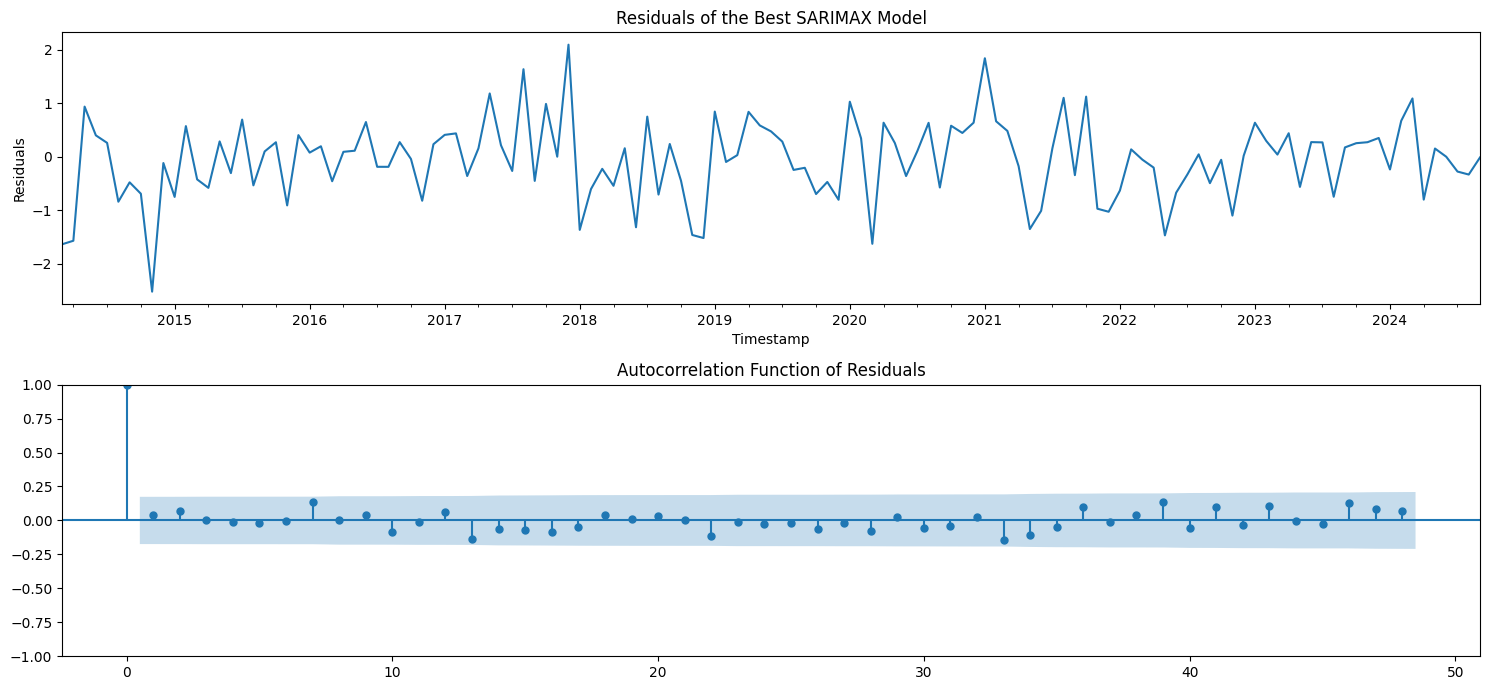

In [41]:
# Plot STL decomposition of the residuals and ACF
plt.figure(figsize=(15, 7))

# Plot residuals
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
plt.title('Residuals of the Best SARIMAX Model')

# Plot ACF of residuals
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
plt.title('Autocorrelation Function of Residuals')

# Perform Dickey-Fuller test on the residuals
p_value_resid = sm.tsa.stattools.adfuller(best_model.resid[13:].dropna())[1]
print(f"Dickey-Fuller test for residuals: p={p_value_resid}")

plt.tight_layout()
plt.show()


In [42]:
def invboxcox(y, lmbda):
    if lmbda == 0:
        return np.exp(y)  # For lambda=0, the Box-Cox transformation is equivalent to a log transformation
    else:
        return np.exp(np.log(lmbda * y + 1) / lmbda)  # Log and Box-Cox relationship


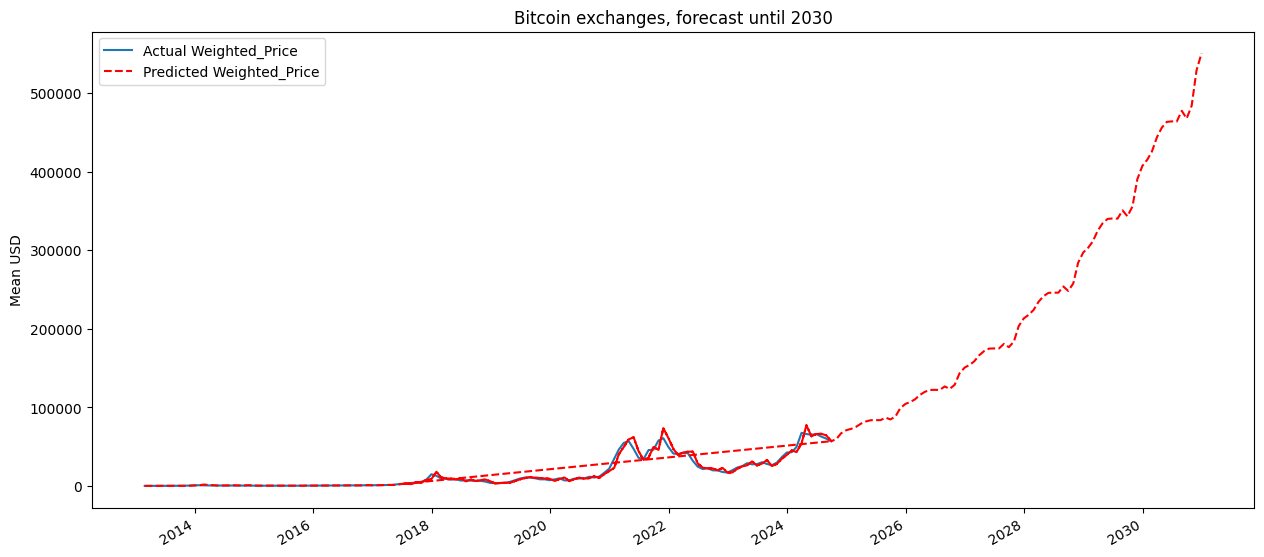

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Prepare the original data for prediction (use 'weighted_price')
df_month2 = df_monthly[['weighted_price']].copy()

# Create a list of future dates for forecasting (monthly dates from 2017 to 2030)
future_dates = pd.date_range(start='2017-06-30', end='2030-12-31', freq='M')

# Create a future DataFrame with the same columns and index as future dates
future = pd.DataFrame(index=future_dates, columns=df_month2.columns)

# Concatenate future data into the original DataFrame
df_month2 = pd.concat([df_month2, future])

# Perform predictions using the SARIMAX model, making sure to predict over the entire range including future
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=len(df_month2) - 1), lmbda)

# Plot the actual vs predicted values
plt.figure(figsize=(15, 7))
df_month2['weighted_price'].plot(label='Actual Weighted_Price')
df_month2['forecast'].plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, forecast until 2030')
plt.ylabel('Mean USD')
plt.show()
